 
# <center> Wrangle and Analyze "WeRateDogs" Twitter Data </center>
    
    
<center><i>GHAIDA .S ALTUWAIJRI </i></center>
<center><i>jul 21, 2020</i></center> 




## Table of Contents
- [Introduction](#intro)
- [Part I - Data Wrangling](#Wrangling)
   - [Gathering Data](#Wrangling)
   - [Assessing Data](#Assessing)
   - [Cleaning Data](#Cleaning)
- [Part II - Data Analysis and Visualization](#Analysis)


<a id='intro'></a>
### Introduction

This project aims to to get insightful information about dog ratings from the twitter page WeRateDogs™, while demonstrating advanced data wrangling and visualization techniques using various Python libraries. WeRateDogs is a Twitter account that rates people's dogs along with a humorous comment. Theseratings almost always have a denominator of 10, and a numerator that is usually greater than 10  because "they're good dogs". The higher thenumerator rating, the 'better' the dog. WeRateDogs has over 4 million followers and has received internationalmedia coverage.

<a id='Wrangling'></a>
### Data Wrangling



<a id='Wrangling'></a>
### Gathering data
- Original ratings (no retweets)
- Not need to gather the tweets beyond August 1st, 2017

In [1]:
# Import pandas, NumPy, requests, tweepy, json
# import the needed libraries
import pandas as pd
import numpy as np
import requests
import zipfile
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
plt.style.use('bmh')
from PIL import Image
from io import BytesIO
%matplotlib inline
# import tweepy as tp
# import json
# from PIL import Image
# from wordcloud import WordCloud, STOPWORDS
# import os
# %pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
# import sys
# print(sys.executable)

In [2]:
# load csv file into df
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
# Programmatically download file from website.
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
# read 'image-predictions.tsv' in a df
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


I tried to set up a twitter developer account, but my application was not approved.

    The following code is the Twitter API code supported by Udacity.
    So, I will comment it as a matter of reproducibilty when rerun all the code cells in this Jupyter notebook.

In [4]:
# connect to the twitter api
#Use Tweepy library to query the Twitter API for each tweet's JSON data
# These are hidden to comply with Twitter's API terms and conditions
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file


# consumer_key = 'xxxx xxxx xxxx xxxx'
# consumer_secret = 'xxxx xxxx xxxx xxxx'
# access_token = 'xxxx xxxx xxxx xxxx'
# access_secret = 'xxxx xxxx xxxx xxxx'


# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [5]:
# extract the file from the zipfile
with open('tweet-json.zip','rb') as f:
    z_tweets = zipfile.ZipFile(f)
    z_tweets.extractall()

# check for the extracted file
z_tweets.namelist()

['tweet-json copy']

In [6]:
# read the file in DataFrame
with open('tweet-json copy', 'r') as f:
    df3 = pd.read_json(f, lines= True, encoding = 'utf-8')

df3.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [7]:
df3.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [8]:
# select the needed columns : 'id', 'favorite_count','retweet_count'
df3 = df3.loc[:,['id','favorite_count','retweet_count']]
df3.head(3)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


<a id='Assessing'></a>
### Assessing Data
- at least 8 quality issues
- at least 2 tidiness issues
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.

***Visual assessment***

    Now we have Three datasets df , df2 and df3. And we will display them one by one for visual assessing

In [9]:
# display twitter-archive-enhanced which incloulds the tweet_id, rating_numerator, and rating_denominator, name
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
# display image-predictions.tsv which is downloaded programmatically and shows tweet_id,
## p1,p2,p3 which is the name or type, 
## p1_conf, p2_conf, p3_conf which is the percentage,
## p1_dog which is True if they are dogs and False if they are not
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
# display tweet-json.zip which is the extracted zip file 
# it will incloud id, favorite_count, and retweet_count
df3

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


***Programmatic assessment***

Starting with the first DataFrame df

In [12]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1544,689517482558820352,NaN,NaN,2016-01-19 18:39:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He just wants to make sure you'r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689517482...,12,10,Carl,None,None,None,None
92,874296783580663808,NaN,NaN,2017-06-12 16:06:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,None,None,pupper,None


In [15]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df['name'].value_counts().head(60)

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Buddy         7
Toby          7
Daisy         7
Bailey        7
Leo           6
Rusty         6
Stanley       6
Jax           6
Scout         6
Milo          6
Jack          6
Bella         6
Dave          6
Koda          6
Oscar         6
George        5
Phil          5
Sunny         5
Bentley       5
very          5
Gus           5
Sammy         5
Finn          5
Larry         5
Alfie         5
Louis         5
Oakley        5
Chester       5
Bruce         4
Archie        4
Cassie        4
one           4
Maddie        4
Walter        4
Carl          4
quite         4
Jerry         4
Dexter        4
Reginald      4
Derek         4
Riley         4
Sampson       4
Winnie        4
Moose         4
Reggie        4
Beau          4
Name: name, dtype: int64

In [17]:
# Check if each word start with an upper case letter for the dog's name
df.name.str.istitle().value_counts()

True     2241
False     115
Name: name, dtype: int64

In [18]:
lowers = df.name.loc[df.name.str.islower()].unique()
lowers

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [19]:
df['rating_numerator'].value_counts() ## should be 10
# df['rating_denominator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Notes

***Tidiness Issues***

   - The values of four columns (doggo,floofer,pupper,puppo) on df table should be in one column.
 
 
   - Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf on df2 table should be condensed to one column dog_breed.


   - renameing ['id'] in df3 to ['tweet_id'] to appear the same in all datasets


   - df3 and df2 datasets should be part of our main dataset df.
   
   
   - rating_numerator and rating_denominator on df table should combine in one column called rating_ratio.


***Quality Issues***

   - The rating denominators are inconsistent
   - Some rating numerators are relatively high
   - Rating_numerator and rating_denominator should be float instead of int.  
   - Tweet_id should be a string, not integer
   - Rename the name column to dog_name
   - Some dog names are not actually names like : 'a', 'an', 'the'
   - Not all names are titled
   - Missing dog names recorded as 'None' string instead of NaN
   - Retweets should be deleted
   - Inconsistency in dog breeds

<a id='Cleaning'></a>
### Cleaning Data
- at least eight (8) quality issues
- at least two (2) tidiness issues 
- merging individual pieces of data

In [22]:
#Make copies of the originals
df_clean = df.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

***Tidiness Issue #1***
 - define :
   The values of four columns (doggo,floofer,pupper,puppo) in df dataset should be in one column called **"DoggoLingo"**.
   
   ***DoggoLingo***, is an Internet language that is created from word conversion,and it's implied to be a dog's own idiom, and is presented as what humans have long believed goes on in the canine brain.


 - code

In [23]:
#The values of four columns (doggo,floofer,pupper,puppo) in twitter_archive dataset should be in one column dog_stage with a category datatype.
all_dogs_type = ['doggo', 'floofer', 'pupper', 'puppo']

# replace the 'None' string with np.nan 
df_clean[all_dogs_type] = df_clean[all_dogs_type].replace('None', np.nan)

df_clean['DoggoLingo'] = df_clean[all_dogs_type].\
                                          apply(lambda x: ', '.join(x.dropna().astype(str)),axis =1)

# replace the empty string with nan and change datatype to category and drop the 4 columns
df_clean.DoggoLingo = df_clean.DoggoLingo.replace('', np.nan).astype('category')
df_clean = df_clean.drop(columns = all_dogs_type, axis =1)

In [24]:
# df_clean.sample(80)

 - test

In [25]:
df_clean.DoggoLingo.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: DoggoLingo, dtype: int64

In [26]:
#Example of having 2 DoggoLingo names 
df_clean.query('tweet_id == 759793422261743616')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,DoggoLingo
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,"doggo, pupper"


In [27]:
# check for the data columns and datatype
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  DoggoLingo        

***Tidiness Issue #2***
 - define :
   Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf will condensed to one column dog_breed./n
   
 - code

In [28]:
#Columns p1, p1_dog, p1_conf , p2, p2_dog, p2_conf , p3, p3_dog, p3_conf will condensed to only one column dog_breed.
#dog_breed column will create based on the confidence level of minimum 20% and 'is dog' statements
df2_clean['dog_breed'] = [i['p1'] if i['p1_dog'] == True and i['p1_conf'] > 0.2 
                     else i['p2'] if i['p2_dog'] == True and i['p2_conf'] > 0.2
                     else i['p3'] if i['p3_dog'] == True and i['p3_conf'] > 0.2
                     else np.nan for index, i in df2.iterrows()]

- test

In [29]:
df2_clean.dog_breed.value_counts()[:10]

golden_retriever      152
Labrador_retriever     99
Pembroke               90
Chihuahua              79
pug                    56
Samoyed                44
chow                   41
toy_poodle             39
Pomeranian             37
malamute               30
Name: dog_breed, dtype: int64

***Tidiness Issue #3***
 - define :
   the ['id'] in **df3** is not appear the same to other datasets to merge tables
   
 - code

In [30]:
# rename the id column in df3_clean to tweet_id
df3_clean.columns = ['tweet_id', 'favorite_count', 'retweet_count']

- test

In [31]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


***Tidiness Issue #4***
 - define :
   df3 and df2 datasets should be part of our main dataset df.
   
 - code

In [32]:
# merge df_clean, df2_clean to df_marged, keep only relevant collumns of all dataframes:
table3 = df_clean[['tweet_id','text', 'rating_numerator', 'rating_denominator', 'name', 'DoggoLingo']]
table4 = df2_clean[['tweet_id', 'jpg_url', 'dog_breed']]
df_marged = pd.merge(table3, table4, on=['tweet_id'], how='left')

# join df_marged, df3 with df3_clean
df_marged = pd.merge(df_marged, df3_clean , how = 'inner' , on = 'tweet_id')

 - test

In [33]:
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2354 non-null   int64   
 1   text                2354 non-null   object  
 2   rating_numerator    2354 non-null   int64   
 3   rating_denominator  2354 non-null   int64   
 4   name                2354 non-null   object  
 5   DoggoLingo          379 non-null    category
 6   jpg_url             2073 non-null   object  
 7   dog_breed           1471 non-null   object  
 8   favorite_count      2354 non-null   int64   
 9   retweet_count       2354 non-null   int64   
dtypes: category(1), int64(5), object(4)
memory usage: 186.6+ KB


***Qulity Issues #1, #2, #3***
 - define : 

    - the rating denominators are inconsistent
    - some rating numerators are relatively high
    - rating_numerator and rating_denominator should be float.  
 - code

In [34]:
#drop all columns with rating_denominator not equal to 10 and rating_numerator greater than 20 and less than 1
df_marged = df_marged.drop(df_marged[((df_marged['rating_denominator'] != 10) | (df_marged['rating_numerator'] > 20) 
                                                                    | (df_marged['rating_numerator'] < 1))].index)

 - test #1, #2

In [35]:
df_marged.rating_denominator.value_counts() ## should all == 10

10    2320
Name: rating_denominator, dtype: int64

In [36]:
df_marged.rating_numerator.value_counts() ## should be < 20

12    557
11    463
10    461
13    350
9     156
8     102
7      54
14     54
5      37
6      32
3      19
4      15
2       9
1       8
15      2
17      1
Name: rating_numerator, dtype: int64

In [37]:
#Switch rating_numerator and rating_denominator to float.
df_marged.rating_numerator = df_marged.rating_numerator.astype(float)
df_marged.rating_denominator = df_marged.rating_denominator.astype(float)

 - test #3

In [38]:
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            2320 non-null   int64   
 1   text                2320 non-null   object  
 2   rating_numerator    2320 non-null   float64 
 3   rating_denominator  2320 non-null   float64 
 4   name                2320 non-null   object  
 5   DoggoLingo          378 non-null    category
 6   jpg_url             2048 non-null   object  
 7   dog_breed           1453 non-null   object  
 8   favorite_count      2320 non-null   int64   
 9   retweet_count       2320 non-null   int64   
dtypes: category(1), float64(2), int64(3), object(4)
memory usage: 183.9+ KB


***Tidiness Issue #5***
 - define :
     rating_numerator and rating_denominator should combine in one column called rating_ratio.
   
 - code

In [39]:
# compineing the rating_numerator and rating_denominator in one column called rating_ratio.
df_marged['rating_ratio'] = df_marged.rating_numerator / df_marged.rating_denominator
# deleting rating_numerator and rating_denominator columns
df_marged.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

 - test 

In [40]:
df_marged.head(3)

,tweet_id,text,name,DoggoLingo,jpg_url,dog_breed,favorite_count,retweet_count,rating_ratio
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,39467,8853,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,33819,6514,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,25461,4328,1.2


***Qulity Issue #4***
 - define :
   Tweet_id should be a string, not integer
   
 - code

In [41]:
df_marged.tweet_id = df_marged.tweet_id.astype('object')

 - test

In [42]:
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2320 non-null   object  
 1   text            2320 non-null   object  
 2   name            2320 non-null   object  
 3   DoggoLingo      378 non-null    category
 4   jpg_url         2048 non-null   object  
 5   dog_breed       1453 non-null   object  
 6   favorite_count  2320 non-null   int64   
 7   retweet_count   2320 non-null   int64   
 8   rating_ratio    2320 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 165.8+ KB


***Qulity Issue #5***
 - define :
    rename to dog_name
   
 - code

In [43]:
# rename the name column to dog_name
df_marged.rename(columns={'name':'dog_name'},inplace=True)

 - test

In [44]:
df_marged.head(1)

,tweet_id,text,dog_name,DoggoLingo,jpg_url,dog_breed,favorite_count,retweet_count,rating_ratio
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,39467,8853,1.3


***Qulity Issue #6***
 - define : Some dog names are not actually names like : 'a', 'an', 'the'
   
 - code

In [45]:
df_marged['dog_name'] = df_marged['dog_name'].replace(['a','an','the','this','not','by','old','my','all','Object','Name'], np.nan)

- tset 

In [46]:
assert sum(df_marged['dog_name'] == 'a') + sum(df_marged['dog_name'] == 'an') + sum(df_marged['dog_name'] == 'a') == 0

***Qulity Issue #7***
 - define : not all names are titled
   
 - code

In [47]:
# Set name column to capitalize the first letter.
df_marged['dog_name'] = df_marged.dog_name.str.capitalize()

 - test

In [48]:
df_marged['dog_name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2349        None
2350         NaN
2351         NaN
2352         NaN
2353        None
Name: dog_name, Length: 2320, dtype: object

***Qulity Issue #8***
 - define : Missing dog names recorded as 'None' string instead of NaN
   
 - code

In [49]:
df_marged['dog_name'] = df_marged['dog_name'].replace('None', np.nan)

 - test

In [50]:
assert sum(df_marged['dog_name'] == 'None') == 0

***Qulity Issue #9***
 - define : No retweets needed
     - text column reveals the truth about that some tweets are not related to dogs so we will check for the text column for only rate dogs 
     - drop retweets
 - code

In [51]:
len(df_marged)

2320

In [52]:
not_dogs = df_marged.loc[df_marged.text.str.match('.*only rate dogs')]
#drop retweets
df_marged.drop(not_dogs.index,axis= 0,inplace=True)
len(not_dogs)

64

 - test

In [53]:
len(df_marged)

2256

***Qulity Issue #10***
 - define : 
    inconsistency in dog breeds

   
 - code

In [54]:
# change it's type to string,
df_marged['dog_breed'] = df_marged['dog_breed'].astype('str')
#convert all the breeds to lowercase and remove dashes and underscores
df_marged['dog_breed'] = df_marged['dog_breed'].str.lower().str.replace('_', ' ').str.replace('-', ' ')
#replace 'nan' string valuse with NaN
df_marged['dog_breed'] = df_marged['dog_breed'].replace('nan', np.nan)

 - test

In [55]:
df_marged['dog_breed'].head(10)

0                         NaN
1                   chihuahua
2                   chihuahua
3                         NaN
4                      basset
5    chesapeake bay retriever
6                 appenzeller
7                  pomeranian
8               irish terrier
9                    pembroke
Name: dog_breed, dtype: object

#### Final Cleaned Table
 
  - Asses the final table
  - Stored the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv
  

In [56]:
df_marged.head()

,tweet_id,text,dog_name,DoggoLingo,jpg_url,dog_breed,favorite_count,retweet_count,rating_ratio
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,39467,8853,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,33819,6514,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,25461,4328,1.2
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,42908,8964,1.3
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,41048,9774,1.2


In [57]:
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 0 to 2353
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tweet_id        2256 non-null   object  
 1   text            2256 non-null   object  
 2   dog_name        1511 non-null   object  
 3   DoggoLingo      378 non-null    category
 4   jpg_url         1990 non-null   object  
 5   dog_breed       1406 non-null   object  
 6   favorite_count  2256 non-null   int64   
 7   retweet_count   2256 non-null   int64   
 8   rating_ratio    2256 non-null   float64 
dtypes: category(1), float64(1), int64(2), object(5)
memory usage: 161.2+ KB


In [58]:
df_marged.to_csv('twitter_archive_master.csv', encoding = 'utf-8') #saved

<a id='Analysis'></a>
### Data Analysis and Visualization

- At least three (3) insights and one (1) visualization must be produced.
 

#### Shows Retweet Counts Vs Ratings Ratio

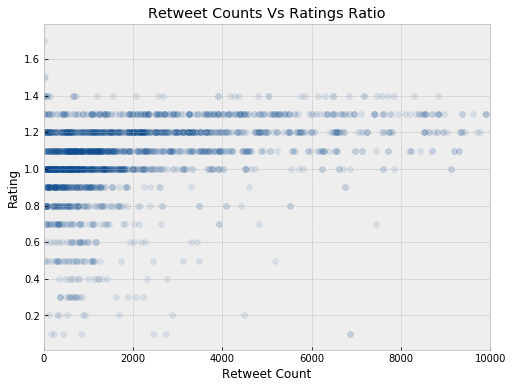

In [59]:
plt.figure(figsize=[8,6])
plt.scatter(x=df_marged['retweet_count'], y=df_marged['rating_ratio'], alpha=0.1, color='#0E4D92')
plt.xlim(0, 10000)
plt.xlabel('Retweet Count')
plt.ylabel('Rating')
plt.title('Retweet Counts Vs Ratings Ratio');

#### Distribution of Dog Breeds

In [60]:
df_marged.dog_breed.value_counts()

golden retriever      146
labrador retriever     89
pembroke               86
chihuahua              78
pug                    53
                     ... 
japanese spaniel        1
entlebucher             1
silky terrier           1
standard schnauzer      1
scotch terrier          1
Name: dog_breed, Length: 110, dtype: int64

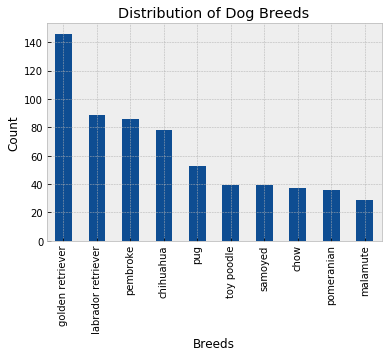

In [61]:
# frequency for dog breeds
df_marged.dog_breed.value_counts()[:10].plot(kind='bar', color = '#0E4D92')
plt.title('Distribution of Dog Breeds')
plt.xlabel('Breeds')
plt.ylabel('Count');

#### Distribution of Dog Names

In [62]:
name_list = df_marged['dog_name'].value_counts().head(15)
name_list

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Tucker     10
Lola       10
Penny      10
Winston     9
Bo          9
Sadie       8
Daisy       7
Bailey      7
Buddy       7
Toby        7
Stanley     6
Name: dog_name, dtype: int64

In [63]:
names_list = df_marged.dog_name.value_counts().index.tolist()

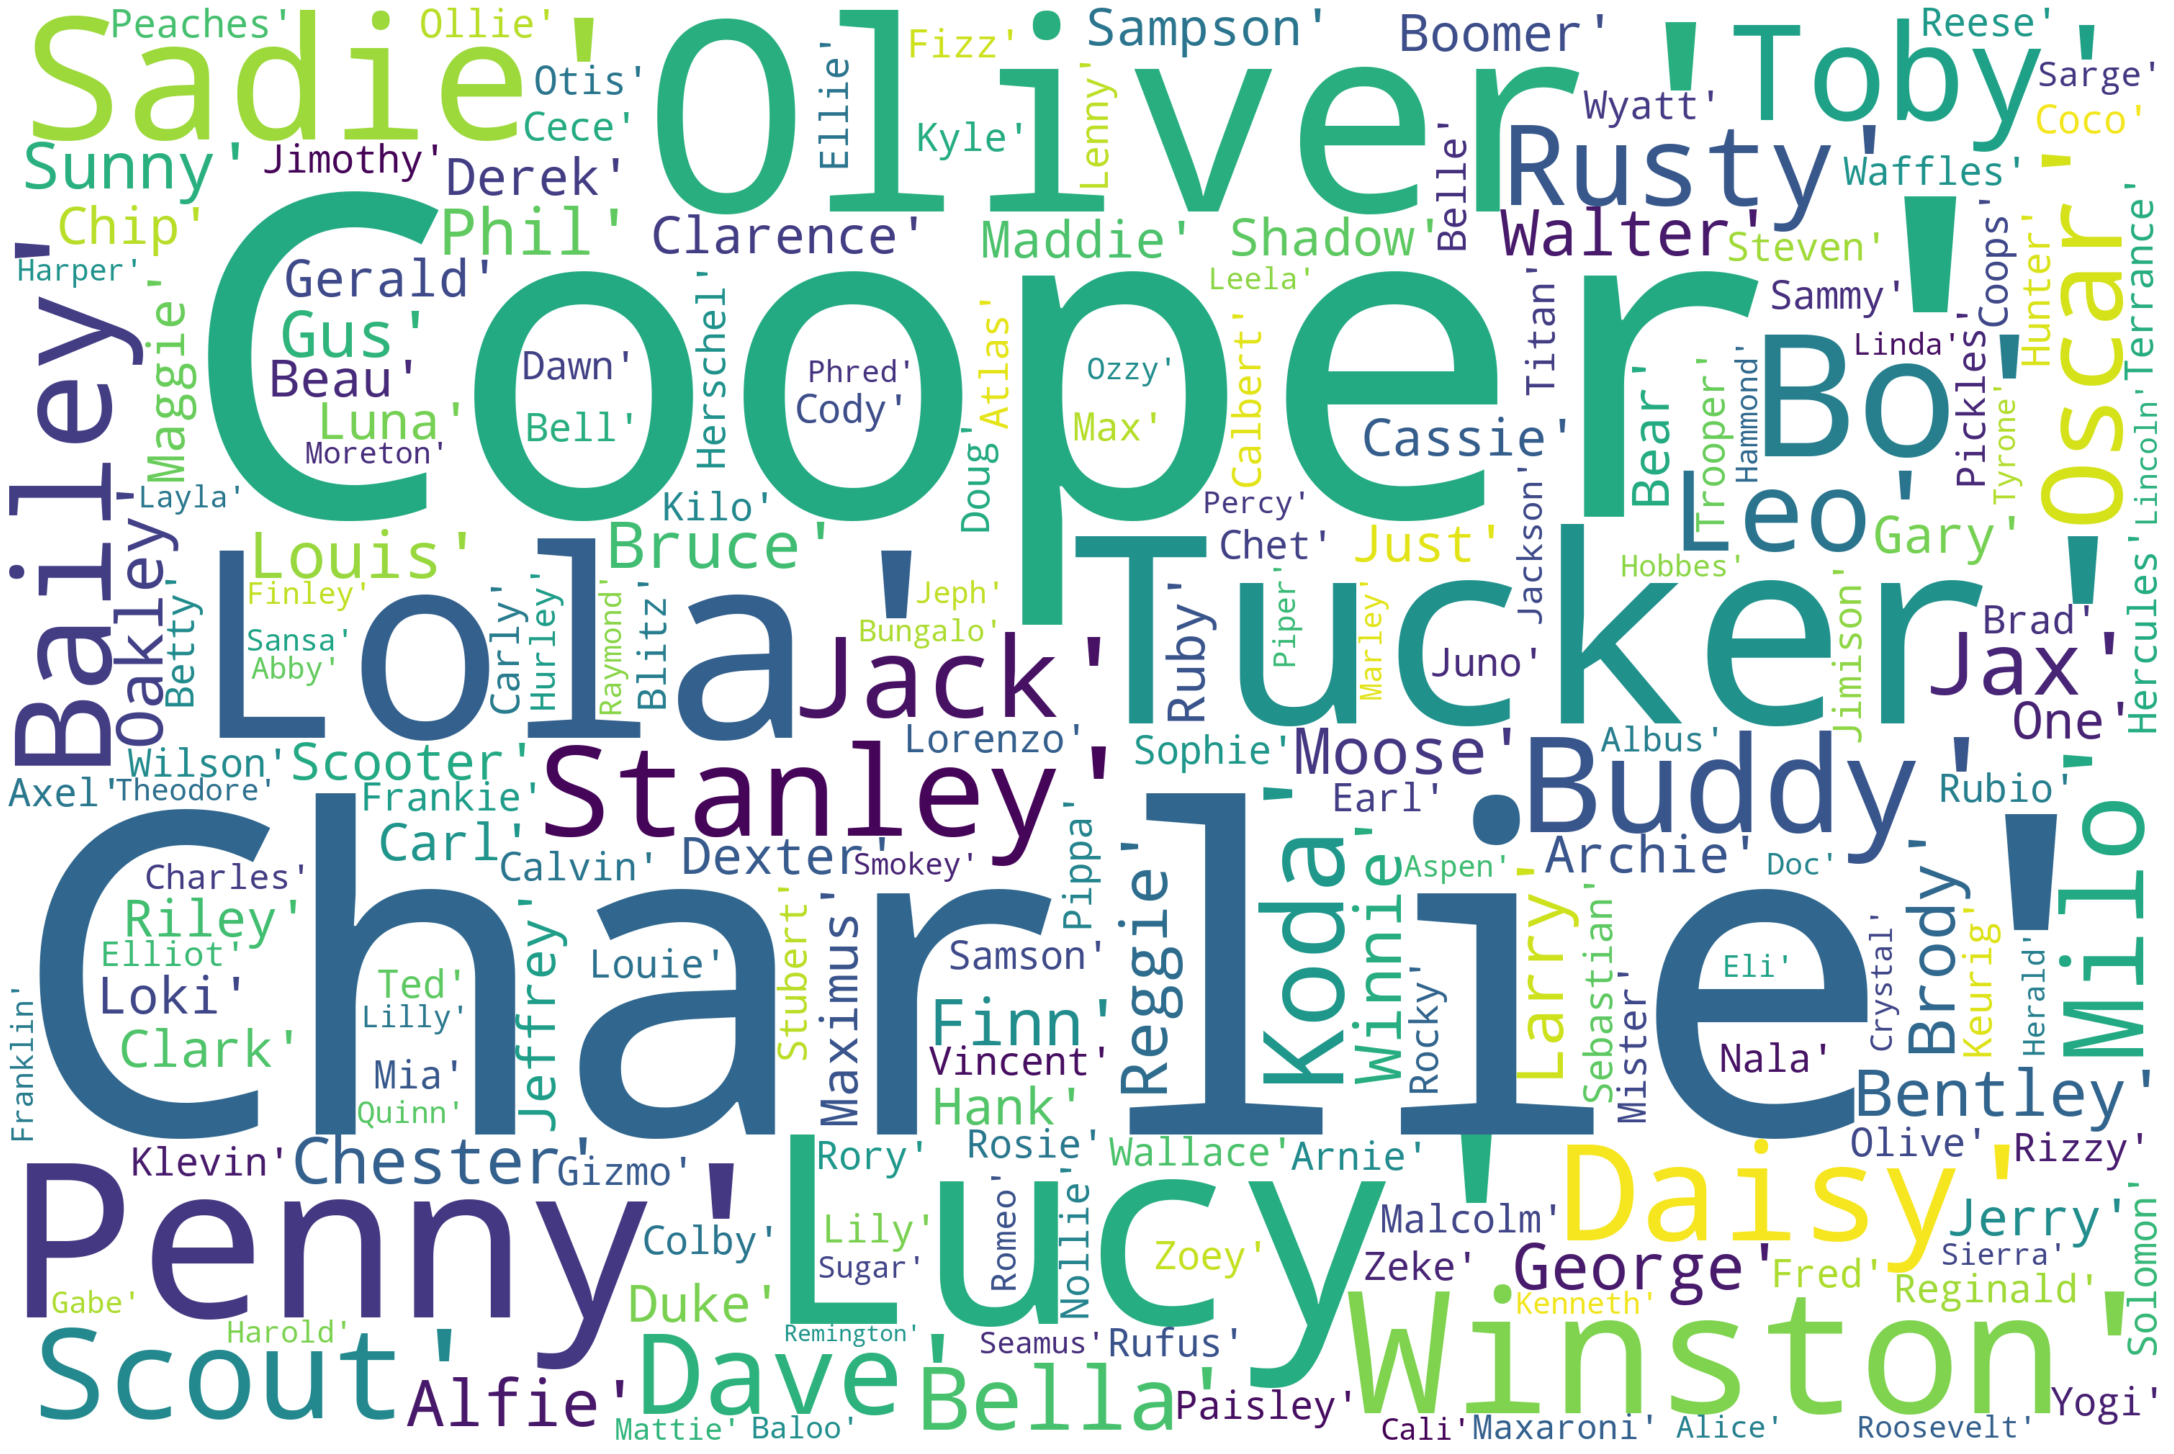

In [64]:
text = names_list
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    contour_color='#0E4D92',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (30, 20)
    )
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### Most Tweeted DoggoLingo stages

In [65]:
# groups the dataset by dog stages and computes the average favorite count for each group
stage_groups_fav = df_marged.groupby('DoggoLingo')['favorite_count'].mean()

# sorts the stage groups by descending order
stage_groups_fav = stage_groups_fav.sort_values(ascending=False)

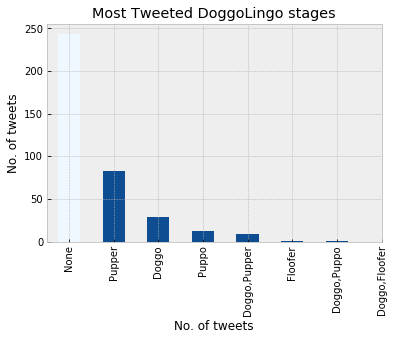

In [66]:
x_axis = list(stage_groups_fav)
y_axis = [i.title() for i in stage_groups_fav.index]

dog_stages_count = df_marged['DoggoLingo'].value_counts()
x = np.arange(8)
colors = ['#0E4D92' if (x < max(x_axis)) else '#F0F8FF' for x in x_axis]
dog_stages_count.plot(color=colors, kind = 'bar', title = 'Most Tweeted DoggoLingo stages')
plt.ylabel('No. of tweets');
plt.xlabel('No. of tweets');
plt.xticks(x, ('None', 'Pupper', 'Doggo', 'Puppo', 'Doggo,Pupper', 'Floofer', 'Doggo,Puppo', 'Doggo,Floofer'));

#### Top 10 Favorite Count for Dog Breeds

In [67]:
# groups the dataset by dog stages and computes the average favorite count for each group
bread_fav = df_marged.groupby('dog_breed')['favorite_count'].mean()[:10]

# sorts the stage groups by descending order
bread_fav = bread_fav.sort_values(ascending=False)
#stage_groups_fav

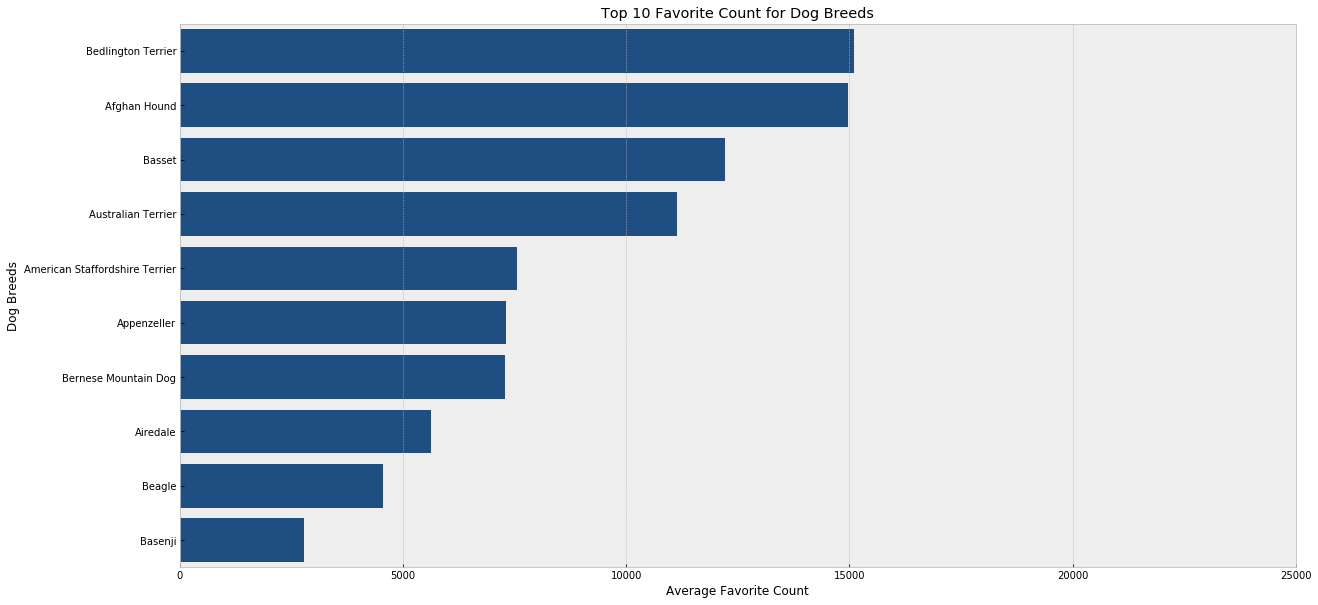

In [68]:
# define axis values
x_axis = list(bread_fav)
y_axis = [i.title() for i in bread_fav.index]

# plot the bar chart
plt.figure(figsize=[20,10])
plt.xlim(0,25000)
plt.xlabel('Average Favorite Count')
plt.ylabel('Dog Breeds')
plt.title('Top 10 Favorite Count for Dog Breeds')
colors = ['#0E4D92']
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();


### Resources


[1]: Wikipedia,  https://en.wikipedia.org/wiki/DoggoLingo 

[2]: Udacity, https://review.udacity.com/#!/rubrics/1136/view

[3]: matplotlib, https://matplotlib.org/3.1.0/gallery/statistics/barchart_demo.html#sphx-glr-gallery-statistics-barchart-demo-py

